In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from statsmodels.tsa.stattools import adfuller

In [3]:
df=pd.read_csv("dmart.csv")

In [4]:
print(df.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [5]:
print(df.tail())

        Store  Dept        Date  Weekly_Sales  IsHoliday
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False


In [6]:
df.dropna()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [7]:
#no null values detected as number of fields are as it is 421569 before and after executing dropna function

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
print(df.head())
print(df.tail())

   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False
        Store  Dept       Date  Weekly_Sales  IsHoliday
421565     45    98 2012-09-28        508.37      False
421566     45    98 2012-10-05        628.10      False
421567     45    98 2012-10-12       1061.02      False
421568     45    98 2012-10-19        760.01      False
421569     45    98 2012-10-26       1076.80      False


In [10]:
df.set_index(['Date'],inplace=True)  #setting the date column as index

In [11]:
print(df.head())
print(df.tail())

            Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1      24924.50      False
2010-02-12      1     1      46039.49       True
2010-02-19      1     1      41595.55      False
2010-02-26      1     1      19403.54      False
2010-03-05      1     1      21827.90      False
            Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2012-09-28     45    98        508.37      False
2012-10-05     45    98        628.10      False
2012-10-12     45    98       1061.02      False
2012-10-19     45    98        760.01      False
2012-10-26     45    98       1076.80      False


In [12]:
pip install gmaps

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
import gmaps
import gmaps.datasets

In [14]:
df['IsHoliday'] = df['IsHoliday'].map({False: 0, True: 1})

In [15]:
df

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,0
2010-02-12,1,1,46039.49,1
2010-02-19,1,1,41595.55,0
2010-02-26,1,1,19403.54,0
2010-03-05,1,1,21827.90,0
...,...,...,...,...
2012-09-28,45,98,508.37,0
2012-10-05,45,98,628.10,0
2012-10-12,45,98,1061.02,0


In [16]:
df['IsHoliday'] = df['IsHoliday'].astype(int)  # Convert to integers


In [17]:
# Separate the data for IsHoliday = 1 and IsHoliday = 0
df_1 = df[df['IsHoliday'] == 1]
df_0 = df[df['IsHoliday'] == 0]

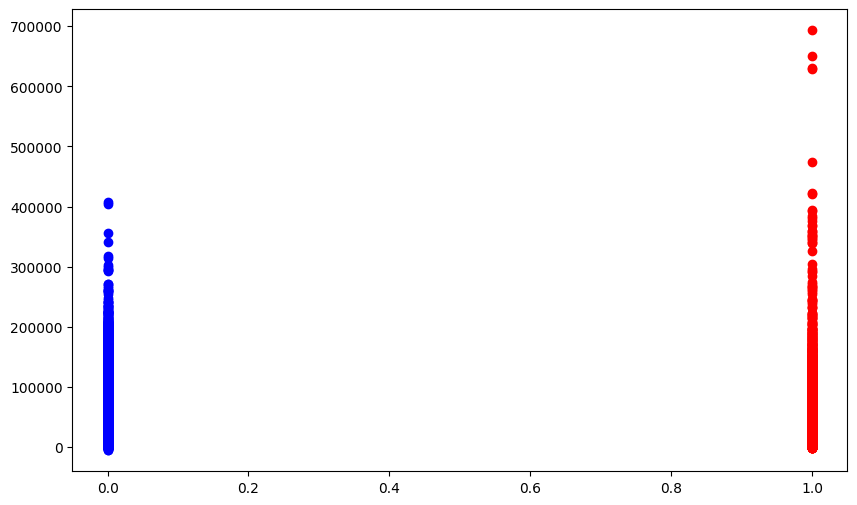

In [18]:
# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for IsHoliday = 1
plt.scatter(df_1['IsHoliday'], df_1['Weekly_Sales'], color='red', label='IsHoliday=1')

# Scatter plot for IsHoliday = 0
plt.scatter(df_0['IsHoliday'], df_0['Weekly_Sales'], color='blue', label='IsHoliday=0')

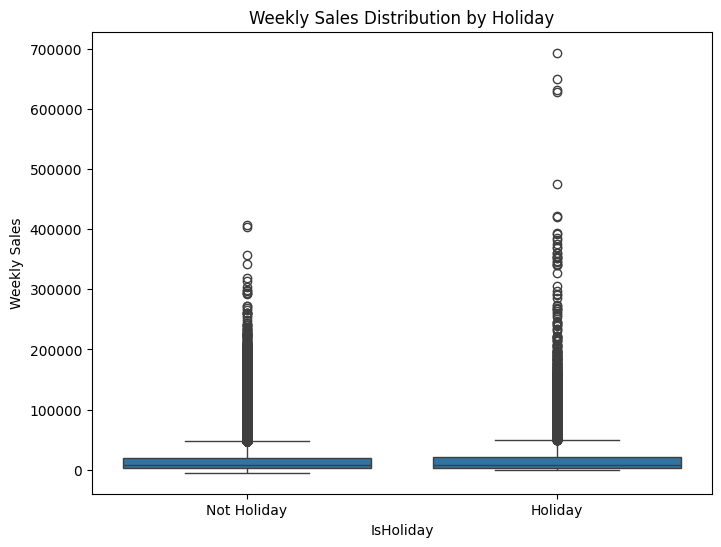

In [19]:
import seaborn as sns

# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution by Holiday')
plt.xlabel('IsHoliday')
plt.ylabel('Weekly Sales')
plt.xticks([0, 1], ['Not Holiday', 'Holiday'])
plt.show()


In [20]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


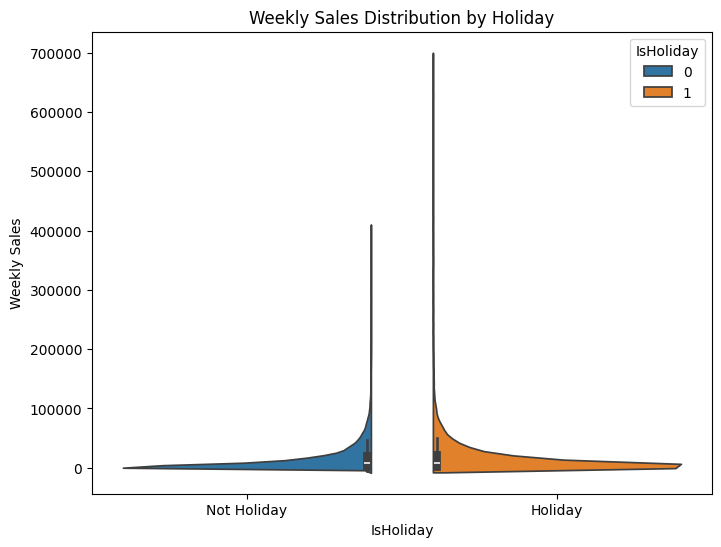

In [21]:
import seaborn as sns

# Plotting
plt.figure(figsize=(8, 6))
sns.violinplot(x='IsHoliday', y='Weekly_Sales', data=df, hue='IsHoliday', split=True)
plt.title('Weekly Sales Distribution by Holiday')
plt.xlabel('IsHoliday')
plt.ylabel('Weekly Sales')
plt.xticks([0, 1], ['Not Holiday', 'Holiday'])
plt.legend(title='IsHoliday', loc='upper right')
plt.show()


In [22]:
ts= df['Weekly_Sales']

<Axes: xlabel='Date'>

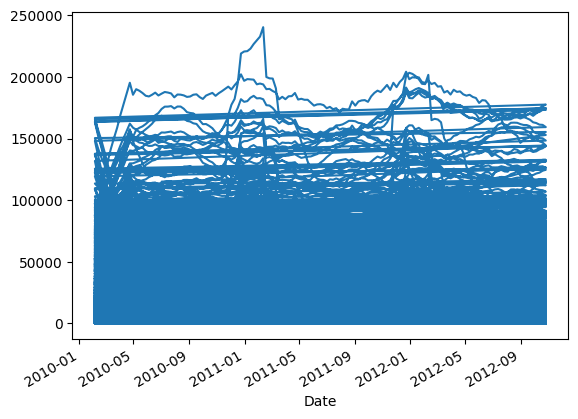

In [23]:
ts.rolling(12).mean().plot()

<Axes: xlabel='Date'>

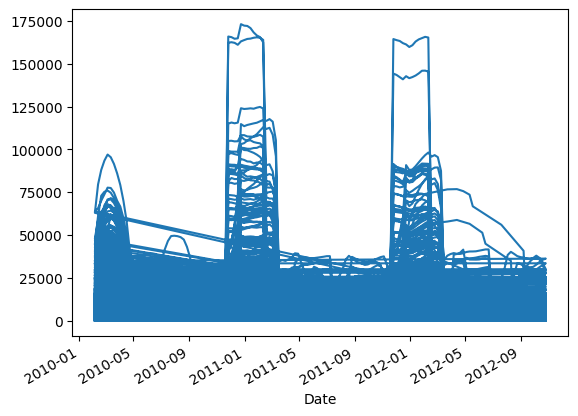

In [24]:
ts.rolling(12).std().plot()